In [16]:
import numpy as np
import pandas as pd

In [1]:
!wget -nc https://lazyprogrammer.me/course_files/sp500_close.csv

--2022-09-09 22:00:14--  https://lazyprogrammer.me/course_files/sp500_close.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4143332 (4.0M) [text/csv]
Saving to: ‘sp500_close.csv’

sp500_close.csv     100%[===================>]   3.95M  2.73MB/s    in 1.4s    

2022-09-09 22:00:17 (2.73 MB/s) - ‘sp500_close.csv’ saved [4143332/4143332]



In [5]:
df = pd.read_csv("sp500_close.csv", index_col=0, parse_dates=True)
df.head()

,AAL,AAPL,AAP,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,...,XLNX,XL,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
2013-02-08,14.75,67.8542,78.90,36.25,46.89,34.41,73.31,39.12,45.70,30.22,...,37.51,28.24,88.61,42.87,31.84,27.09,65.30,75.85,24.14,33.05
2013-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-11,14.46,68.5614,78.39,35.85,46.76,34.26,73.07,38.64,46.08,30.28,...,37.46,28.31,88.28,42.84,31.96,27.46,64.55,75.65,24.21,33.26
2013-02-12,14.27,66.8428,78.60,35.42,46.96,34.30,73.37,38.89,46.27,30.81,...,37.58,28.41,88.46,42.87,31.84,27.95,64.75,75.44,24.49,33.74


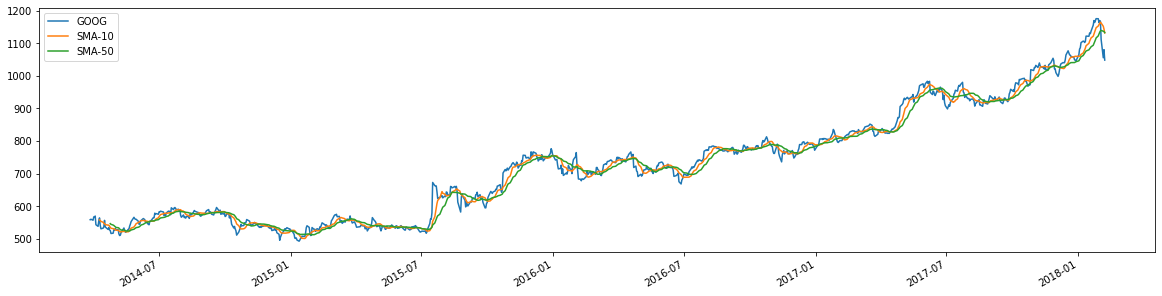

In [26]:
# Select GOOG and calculate simple rolling average for different rolling windows
goog = df[["GOOG"]].copy().dropna()
goog["SMA-10"] = goog['GOOG'].rolling(10).mean()
goog["SMA-50"] = goog['GOOG'].rolling(20).mean()
goog.plot(figsize=(20, 5));

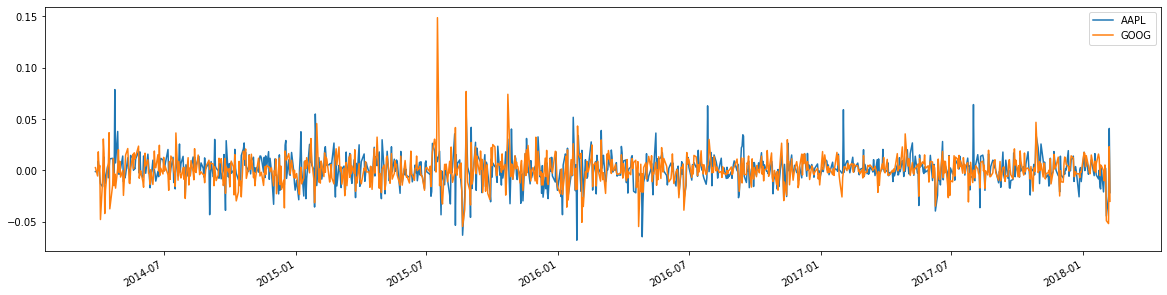

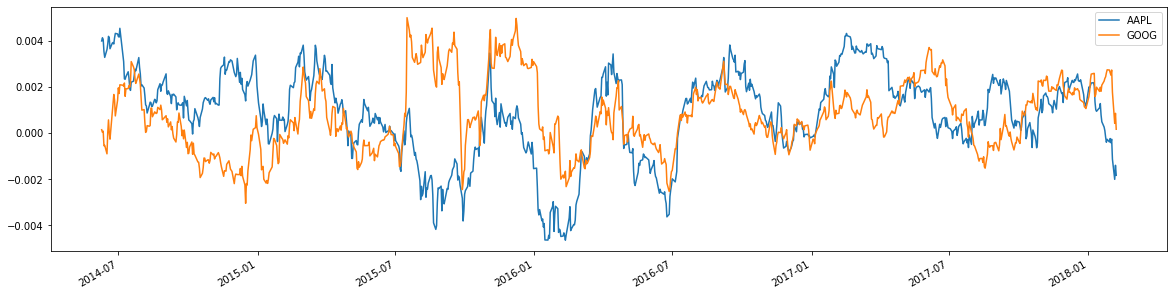

In [37]:
# Consider GOOG and AAPL and the cov & corr of log-returns
goog_aapl = df[["AAPL","GOOG"]].copy().dropna()
goog_aapl_ret = np.log(1 + goog_aapl.pct_change()).dropna()  # log-return
goog_aapl_ret_sma = goog_aapl_ret.rolling(50).mean().dropna()  # SMA of log-return
goog_aapl_ret.plot(figsize=(20, 5));
goog_aapl_ret_sma.plot(figsize=(20, 5));  

In [31]:
goog_aapl_ret.rolling(50).cov()

AAPL      GOOG
2014-03-27 AAPL       NaN       NaN
           GOOG       NaN       NaN
2014-03-28 AAPL       NaN       NaN
           GOOG       NaN       NaN
2014-03-31 AAPL       NaN       NaN
...                   ...       ...
2018-02-05 GOOG  0.000110  0.000183
2018-02-06 AAPL  0.000177  0.000129
           GOOG  0.000129  0.000193
2018-02-07 AAPL  0.000185  0.000142
           GOOG  0.000142  0.000212

[1950 rows x 2 columns]

In [32]:
goog_aapl_ret.rolling(50).corr()

AAPL      GOOG
2014-03-27 AAPL       NaN       NaN
           GOOG       NaN       NaN
2014-03-28 AAPL       NaN       NaN
           GOOG       NaN       NaN
2014-03-31 AAPL       NaN       NaN
...                   ...       ...
2018-02-05 GOOG  0.681098  1.000000
2018-02-06 AAPL  1.000000  0.700564
           GOOG  0.700564  1.000000
2018-02-07 AAPL  1.000000  0.716376
           GOOG  0.716376  1.000000

[1950 rows x 2 columns]